In [1]:
from pandas import DataFrame, read_csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

sns.set_style('whitegrid')
sns.set(font_scale=1.25)

In [2]:
movies_md = r'dataset/movies_tmdbMeta.csv'
movies_md_df = pd.read_csv(movies_md)
pd.set_option('display.max_columns', 50)

In [3]:
# GENRES

movies_md_df['genres'] = movies_md_df['genres'].apply(lambda x: ast.literal_eval(x) if x != np.nan else [])
s = movies_md_df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_df = movies_md_df.drop('genres', axis=1).join(s)
gen_df['genre'].value_counts().shape[0]

20

In [4]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(20)

,genre,movies
0,Drama,20808
1,Comedy,13467
2,Thriller,7793
3,Romance,6923
4,Action,6727
5,Horror,4760
6,Crime,4387
7,Documentary,4050
8,Adventure,3587
9,Science Fiction,3137


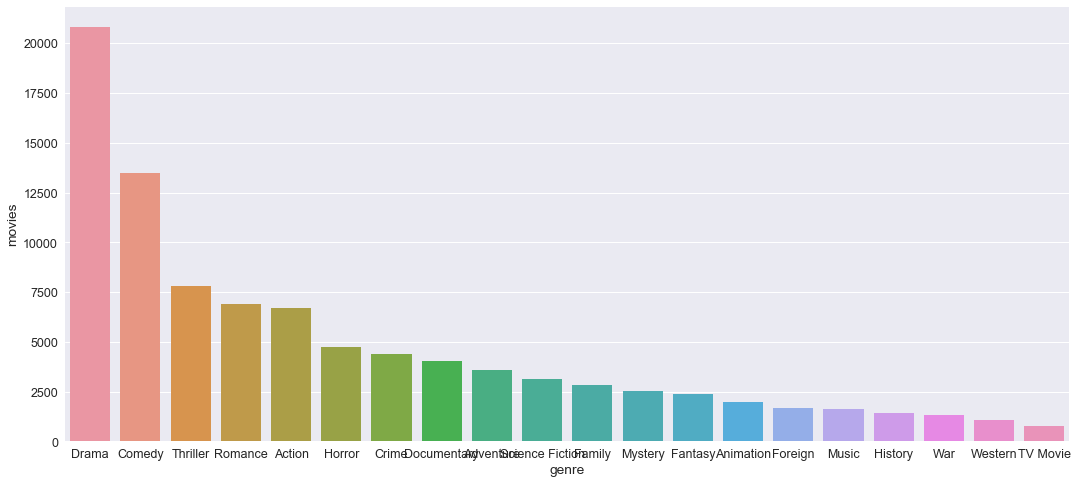

In [5]:
# Graphical Representation of Genres

plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(20))
plt.show()

In [6]:
# PRODUCTION COUNTRIES

movies_md_df['production_countries'] = movies_md_df['production_countries'].apply(lambda x: ast.literal_eval(x) if x != np.nan else [])
s = movies_md_df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'production_country'
prod_df = movies_md_df.drop('production_countries', axis=1).join(s)
prod_df['production_country'].value_counts().shape[0]

160

In [7]:
pop_prod = pd.DataFrame(prod_df['production_country'].value_counts()).reset_index()
pop_prod.columns = ['production_country', 'movies']
pop_prod.head(20)

,production_country,movies
0,United States of America,21484
1,United Kingdom,4186
2,France,4079
3,Germany,2324
4,Italy,2240
5,Canada,1795
6,Japan,1726
7,Spain,982
8,Russia,924
9,India,868
